In [ ]:
Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link
Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.
Q2. Split the dataset into a training set (70%) and a test set (30%).
Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.
Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.
Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.
Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [1]:
import pandas as pd 
df  = pd.read_csv('dataset.csv')

In [2]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
print(df.isnull().value_counts())

age    sex    cp     trestbps  chol   fbs    restecg  thalach  exang  oldpeak  slope  ca     thal   target
False  False  False  False     False  False  False    False    False  False    False  False  False  False     303
dtype: int64


In [14]:
X= df.drop(labels=['target'] , axis =1 )
y  = df['target']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators=100 ,  max_depth=10)

In [18]:
random

RandomForestClassifier(max_depth=10)

In [20]:
random.fit(X_train , y_train )


RandomForestClassifier(max_depth=10)

In [28]:

# Get feature importances
importances = random.feature_importances_
feature_names = X.columns

# Get indices of top 5 features
indices = np.argsort(importances)[-5:]

# Print the names of the top 5 features
top_features = [feature_names[i] for i in indices]
print("Top 5 important features:", top_features)

Top 5 important features: ['oldpeak', 'thalach', 'ca', 'thal', 'cp']


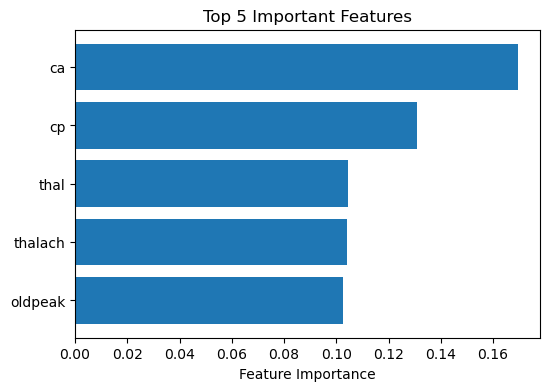

In [26]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X is your feature matrix and y is your target variable
# Fit the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Get indices of top 5 features
indices = np.argsort(importances)[-5:]

# Plotting the top 5 features
plt.figure(figsize=(6, 4))
plt.barh(range(5), importances[indices], align='center')
plt.yticks(range(5), [feature_names[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Top 5 Important Features')
plt.show()


In [32]:
from sklearn.model_selection import GridSearchCV

parameters ={
    'n_estimators':[100 , 200  , 300],
    'max_depth':[3,5,10],
    'min_samples_split':[1,10 , 20 , 100]
}

gscv = GridSearchCV(estimator=random , param_grid=parameters , cv=5, verbose=3)

gscv.fit(X_train , y_train) 
gscv.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END max_depth=3, min_samples_split=1, n_estimators=100;, score=0.902 total time=   0.2s
[CV 2/5] END max_depth=3, min_samples_split=1, n_estimators=100;, score=0.878 total time=   0.2s
[CV 3/5] END max_depth=3, min_samples_split=1, n_estimators=100;, score=0.707 total time=   0.2s
[CV 4/5] END max_depth=3, min_samples_split=1, n_estimators=100;, score=0.875 total time=   0.2s
[CV 5/5] END max_depth=3, min_samples_split=1, n_estimators=100;, score=0.775 total time=   0.2s
[CV 1/5] END max_depth=3, min_samples_split=1, n_estimators=200;, score=0.854 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_split=1, n_estimators=200;, score=0.829 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_split=1, n_estimators=200;, score=0.707 total time=   0.4s
[CV 4/5] END max_depth=3, min_samples_split=1, n_estimators=200;, score=0.875 total time=   0.4s
[CV 5/5] END max_depth=3, min_samples_split=1, n_estimators=200;,

{'max_depth': 10, 'min_samples_split': 20, 'n_estimators': 100}

# for randomized search cv 

In [46]:
par ={
    'n_estimators':[10,20 ,100],
    'max_depth':[1,10,100],
    'min_samples_split':[10,20,50],
    'min_samples_leaf':[1,10, 20 , 50]
}

In [47]:
from sklearn.model_selection import RandomizedSearchCV

randomcv = RandomizedSearchCV(estimator=random ,param_distributions= par , verbose=3 , cv =5  )

randomcv.fit(X_train, y_train)
randomcv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=100, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=0.707 total time=   0.2s
[CV 2/5] END max_depth=100, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=0.829 total time=   0.2s
[CV 3/5] END max_depth=100, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=0.585 total time=   0.2s
[CV 4/5] END max_depth=100, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=0.675 total time=   0.2s
[CV 5/5] END max_depth=100, min_samples_leaf=50, min_samples_split=10, n_estimators=100;, score=0.725 total time=   0.2s
[CV 1/5] END max_depth=10, min_samples_leaf=50, min_samples_split=20, n_estimators=10;, score=0.707 total time=   0.0s
[CV 2/5] END max_depth=10, min_samples_leaf=50, min_samples_split=20, n_estimators=10;, score=0.878 total time=   0.0s
[CV 3/5] END max_depth=10, min_samples_leaf=50, min_samples_split=20, n_estimators=10;, score=0.

{'n_estimators': 20,
 'min_samples_split': 20,
 'min_samples_leaf': 1,
 'max_depth': 1}

In [ ]:
Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [48]:
importance = random.feature_importances_
fearutes_names = X.columns

indices = np.argsort(importances)[-2:]

# Print the names of the top 5 features
top_features = [feature_names[i] for i in indices]
print("Top 5 important features:", top_features)

Top 5 important features: ['thal', 'cp']


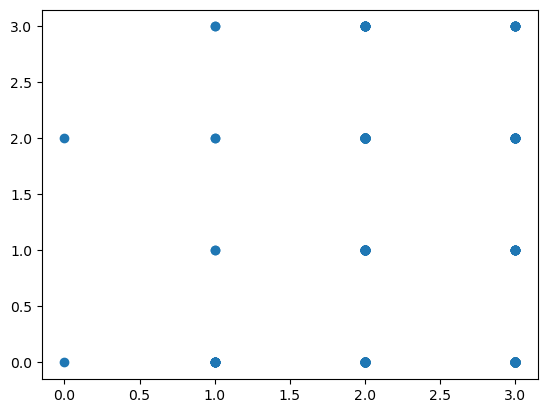

In [53]:
import  matplotlib.pyplot as plt 
plt.scatter(x = df['thal' ], y = df['cp'])